In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
cr = pd.read_csv("https://raw.githubusercontent.com/dannoone/dannoone.github.io/refs/heads/main/Data/credit_risk_bench.csv")
cr

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16709,1.000000,46.0,0.0,170.398010,401.0,3.0,2.0,0.0,0.0,2.0,1
16710,1.135552,41.0,2.0,0.845887,7500.0,12.0,0.0,4.0,1.0,0.0,1
16711,0.920107,31.0,1.0,0.176732,1125.0,4.0,1.0,0.0,0.0,0.0,1
16712,0.983825,55.0,0.0,0.064116,4600.0,2.0,1.0,0.0,0.0,6.0,1


In [3]:
cr_agg = cr
cr_agg['total_late'] = cr_agg['late_30_59'] + cr_agg['late_60_89'] + cr_agg['late_90']

cr_agg = cr_agg.drop(columns = ['late_30_59','late_60_89','late_90'])

cr_agg

,rev_util,age,debt_ratio,monthly_inc,open_credit,real_estate,dependents,dlq_2yrs,total_late
0,0.006999,38.0,0.302150,5440.0,4.0,1.0,3.0,0,0.0
1,0.704592,63.0,0.471441,8000.0,9.0,1.0,0.0,0,0.0
2,0.063113,57.0,0.068586,5000.0,17.0,0.0,0.0,0,0.0
3,0.368397,68.0,0.296273,6250.0,16.0,2.0,0.0,0,0.0
4,1.000000,34.0,0.000000,3500.0,0.0,0.0,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
16709,1.000000,46.0,170.398010,401.0,3.0,0.0,2.0,1,2.0
16710,1.135552,41.0,0.845887,7500.0,12.0,4.0,0.0,1,3.0
16711,0.920107,31.0,0.176732,1125.0,4.0,0.0,0.0,1,2.0
16712,0.983825,55.0,0.064116,4600.0,2.0,0.0,6.0,1,1.0


# DANL 320 Project

## Background

Analyzing credit risk involves determining if a certain borrower will be able to pay off a loan or credit line within the expected time. Banks cannot just simply hand out loans to whoever needs one because it is not guaranteed that the borrower will pay it back. As consumers, we want our banks making very informed decisions, backed by data, on who to give out loans to since we depend on them to handle our money. For banks, identifying borrowers who will potentially commit delinquency allows them to set different interest rates for this type of borrower or even deny the loan altogether which leaves more money for loans that are less risky, potentially increases profits, and therefore helps the bank remain financially stable. With machine learning technologies that are always improving paired with the constant collection of data, banks can use this to their advantage when making tough decisions about loan approvals.

## Problem

Giving out loans that can’t be paid back need to be minimized, but qualifications shouldn’t be so strict that it makes getting a loan extremely difficult for financially responsible borrowers. Banks need to find the right balance so they’re not losing money, but they’re not turning away good customers either.

## Objective

The goal of this project is to execute machine learning models that can predict if a borrower will be able to repay a loan on time based on the borrower’s financial history. These models should be able to accurately find the differences between borrowers who make payments on time and those who do not, so banks can make sound lending decisions.

# Data Description

Our data came from kaggle.com [here](https://www.kaggle.com/datasets/adilshamim8/credit-risk-benchmark-dataset) <br>
 It was created to help compare different machine learning models for binary classification. The borrowers in this dataset are determined to have committed delinquency or not within two years.

## Variables

# Variable Description: <br>
- `rev_util`: revolving credit utilization ratio; The ratio of your credit usage compared to the credit that is available <br>
- `age` <br>
- `monthly_inc`: monthly income
- `late_30_59`: count of each time the borrower made a late payment within 30-59 days after the due date <br>
- `late_60_89`: count of each time the borrower made a late payment within 60-89 days after the due date <br>
- `late_90`: count of each time the borrower made a late payment at least 90 days after the due date <br>
- `debt_ratio`: debt to income/assets ratio (expressed as a percentage) <br>
- `open_credit`: count of open credit lines and loans <br>
- `real_estate`: count of real estate credit lines and loans <br>
- `dependents`: count of dependents claimed by borrower <br>
- `dlq_2yrs`: Indication of a serious delinquency occuring within 2 years <br>
  - 0: No <br>
  - 1: Yes


## Data Cleaning and Processing

To omit the effect of outliers within the `late_*` variables, the `total_late` variable was created to account for all late payments per borrower. This is further explained in the next section under Investigation of Perfect Correlation Among `late_*` Variables.

# Exploratory Analysis

## Correlation Heat Map

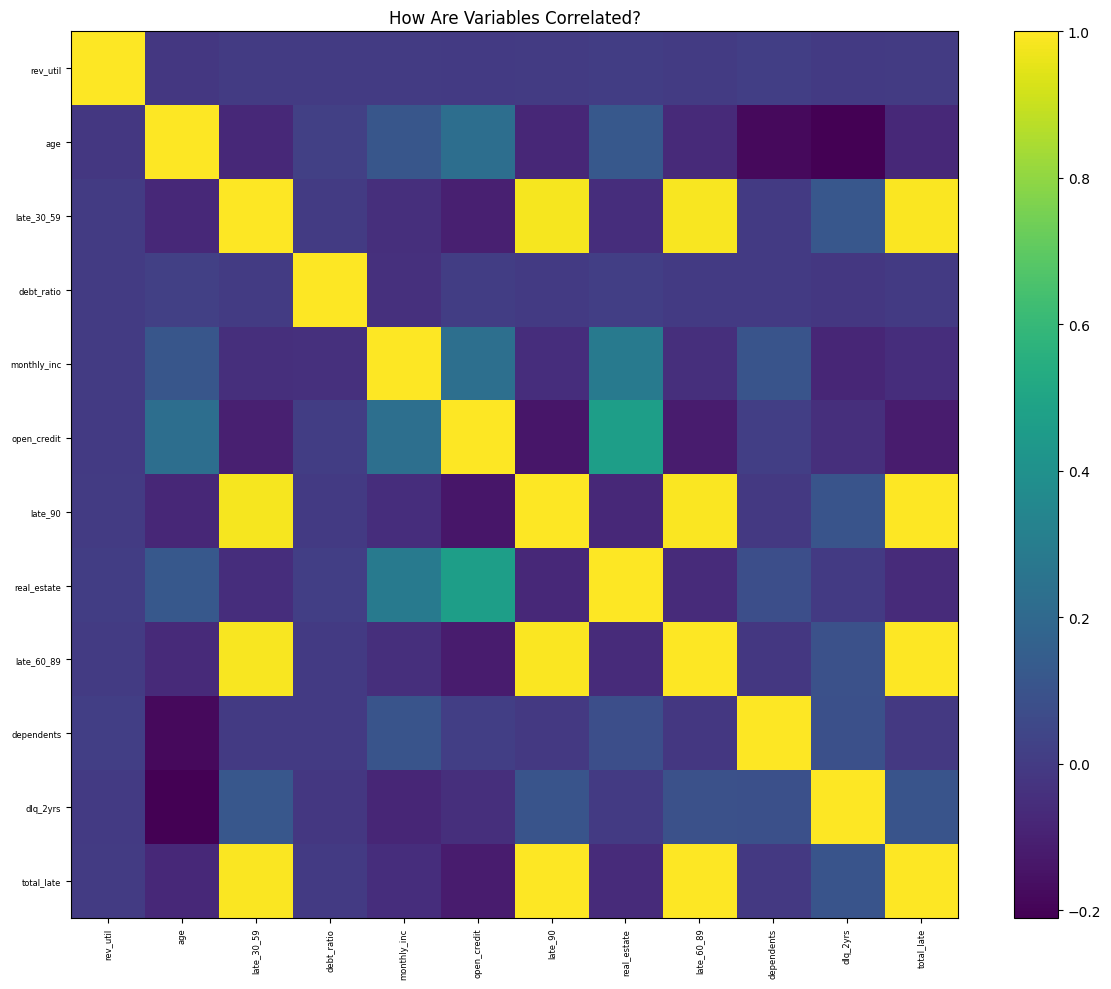

In [4]:
df_corr = cr.copy()
# Compute correlation matrix
corr_matrix = df_corr.corr()

# 3. Correlation heatmap using matplotlib
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.imshow(corr_matrix.values, aspect='auto')
fig.colorbar(cax, ax=ax)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90, fontsize=6)
ax.set_yticklabels(corr_matrix.columns, fontsize=6)
plt.title('How Are Variables Correlated?')
plt.tight_layout()
plt.show()

Surprisingly, the three `late_*` variables are all perfectly correlated. These variables could have such a high correlation because they are each counting the same thing, just in a different time period. It makes sense that a borrower who has fallen behind on a payment will continue to fall behind and make even later payments. This will be investigated further in the next section to determine the true cause. Also, it is important to note that the `real_estate` and `open_credit` variables have a strong, positive correlation. This seems correct, as they are both lines of credit, and it is common for an individual to have these different lines simultaneously.

## Investigation of Perfect Correlations Among `late_*` Variables

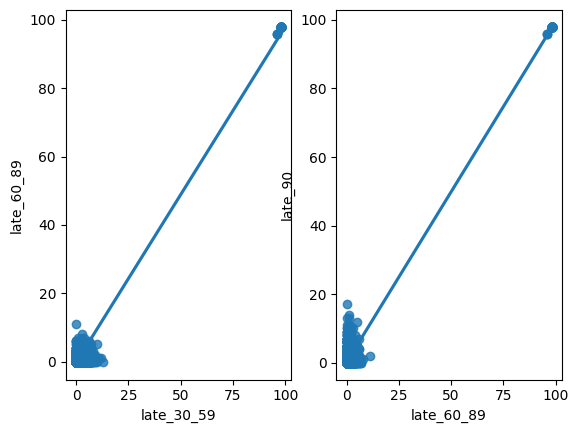

In [5]:
plt.subplot(1,2,1)
sns.regplot(data = cr, x = 'late_30_59', y = 'late_60_89')

plt.subplot(1,2,2)
sns.regplot(data = cr, x = 'late_60_89', y = 'late_90')
plt.show()

In [6]:
# filtering outliers
cr_filter = cr[(cr['late_30_59'] < 60) & (cr['late_60_89'] < 60) & (cr['late_90'] < 60)]

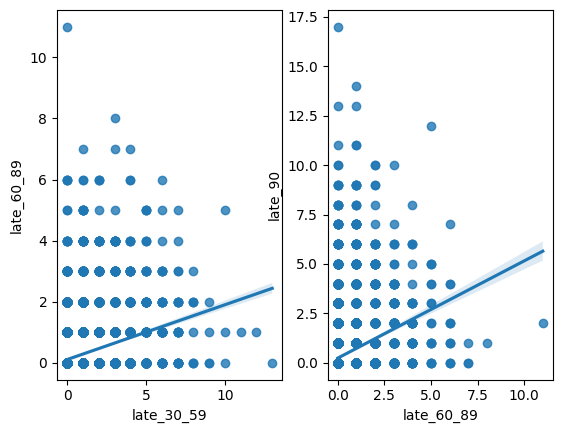

In [7]:
plt.subplot(1,2,1)
sns.regplot(data = cr_filter, x = 'late_30_59', y = 'late_60_89')

plt.subplot(1,2,2)
sns.regplot(data = cr_filter, x = 'late_60_89', y = 'late_90')
plt.show()

The perfect correlations were being caused by extreme outliers in each `late_*` variable. After filtering out these values, you can see a more accurate representation of the relationships between these variables. It is now clear that the points are more scattered. The variables have positive relationships, but they are far from perfect. As briefly mentioned before, a new variable was created to replace these three `late_*` variables to help decrease bias in our machine learning models. The new variable, `total_late`, includes the sum of all late payments made by each borrower.

## Age Distribution

<Axes: xlabel='age', ylabel='Count'>

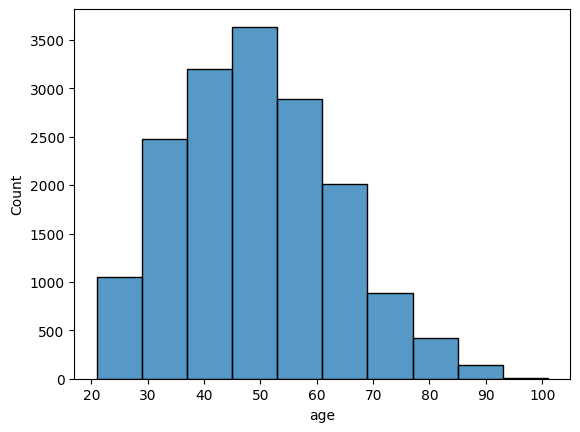

In [8]:
sns.histplot(data = cr, x = 'age', bins = 10)

To get a better idea of the borrowers in these data, here is the distribution of age. As you can see, most of the borrowers are between the ages of about 37 and 61. The dataset is slightly skewed, as there are some older borrowers included as well, between the ages of about 77 and 101.

# Model Motivation

- **Logistic Regression**: determines relationships if any between feature variables and the binary outcome variable. The Elastic Net model will be used to help prevent overfitting since some feature variables have strong relationships, providing the data with regularization. Elastic Net balances between pushing the coefficients of features that are less important closer to 0 (Lasso Model) and grouping correlated features together (Ridge Model). <br>
- **Random Forest**: helps predict the binary outcome variable by creating multiple decision trees from bootstrap samples (random samples taken with replacement) from training data. The final tree is constructed through averaging all of the trees together. Using multiple subsets within the training data helps reduce overfitting.


# Machine Learning Analysis

For our analyses we chose to apply an elastic net regularized logistic regression and a multi-layer perceptron for binary classification purposes
> The target variable here is `dlq_2yrs`: indication of a serious delinquency occuring within 2 years (essentially risky/non risky borrower)(1/0)

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

features = ['rev_util', 'age', 'debt_ratio', 'monthly_inc', 'open_credit', 'real_estate' , 'dependents', 'total_late']
X = np.array(cr_agg[features])
m,n = X.shape
y = np.array(cr_agg['dlq_2yrs']).reshape(m, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

print(f'X_train: {X_train.shape}, {round(X_train.shape[0]/m * 100,2)}%\ny_train: {y_train.shape}, {round(y_train.shape[0]/m * 100,2)}%\nX_test: {X_test.shape}, {round(X_test.shape[0]/m * 100,2)}%\ny_test: {y_test.shape}, {round(y_test.shape[0]/m *100,2)}%')

X_train: (12535, 8), 75.0%
y_train: (12535, 1), 75.0%
X_test: (4179, 8), 25.0%
y_test: (4179, 1), 25.0%


# Elastic Net Logistic Regression <br>
Parameters: <br>
- Cs = 10: goes through ten different values of regularization strength
- cv = 5: 5-fold Cross Validation
- L1_ratios = [.5, .7, .9]: provides different L1 ratios to choose the best one. Determines how heavily Lasso Regularization is used.
- max_iter  = 1000: sets the iteration count to 1000
- scoring = ‘neg_log_loss’: sets Cross Validation performance metric to the deviance


In [12]:
from sklearn.linear_model import LogisticRegressionCV
enet_cv = LogisticRegressionCV(
    Cs=10, cv=5, penalty='elasticnet', solver='saga',
    l1_ratios=[0.5, 0.7, 0.9], max_iter=1000, scoring='neg_log_loss'
)
enet_cv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packag

LogisticRegressionCV(cv=5, l1_ratios=[0.5, 0.7, 0.9], max_iter=1000,
                     penalty='elasticnet', scoring='neg_log_loss',
                     solver='saga')

In [13]:
print("Elastic Net Regression - Best C:", enet_cv.C_[0])
print("Elastic Net Regression - Best l1 ratio:", enet_cv.l1_ratio_[0])

intercept = float(enet_cv.intercept_)
coef_enet = pd.DataFrame({
    'predictor': features,
    'coefficient': list(enet_cv.coef_[0])
})
print("Elastic Net Regression Coefficients:")
print(coef_enet)

Elastic Net Regression - Best C: 10000.0
Elastic Net Regression - Best l1 ratio: 0.9
Elastic Net Regression Coefficients:
     predictor  coefficient
0     rev_util    -0.000025
1          age    -0.000795
2   debt_ratio    -0.000034
3  monthly_inc    -0.000012
4  open_credit     0.000311
5  real_estate     0.000090
6   dependents     0.000237
7   total_late     0.003390


<ipython-input-13-a315c511df1d>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(enet_cv.intercept_)


<ipython-input-14-225bcb34ab87>:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x="coefficient", y="predictor", data=coef_enet, order=order, join=False)


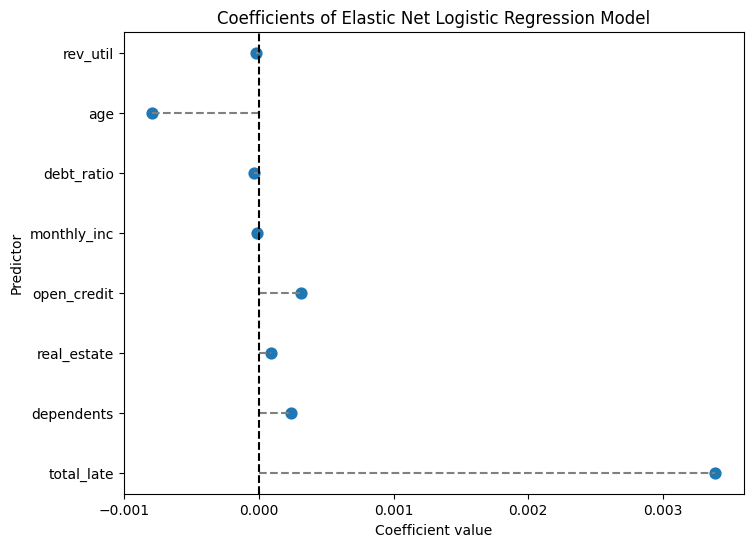

In [14]:
# Force an order for the y-axis
order = coef_enet['predictor'].tolist()

plt.figure(figsize=(8,6))
ax = sns.pointplot(x="coefficient", y="predictor", data=coef_enet, order=order, join=False)
plt.title("Coefficients of Elastic Net Logistic Regression Model")
plt.xlabel("Coefficient value")
plt.ylabel("Predictor")

# Draw horizontal lines from 0 to each coefficient.
for _, row in coef_enet.iterrows():
    # Get the y-axis position from the order list.
    y_pos = order.index(row['predictor'])
    plt.hlines(y=y_pos, xmin=0, xmax=row['coefficient'], color='gray', linestyle='--')

# Draw a vertical line at 0.
plt.axvline(0, color='black', linestyle='--')

plt.show()

This model heavily favored the Lasso Regularization, indicated both by the best L1 ratio; .9, and by the coefficients for each feature; extremely close to 0. This model shows that the biggest influences on borrowers committing a financial delinquency are `total_late` (.003) and `age` (-.001). To check the performance of the model, refer to the confusion matrix.

In [15]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, roc_curve, roc_auc_score)

# Prediction and evaluation for elastic net model
y_pred_prob_enet = enet_cv.predict_proba(X_test)[:, 1]
y_pred_enet = (y_pred_prob_enet > 0.5).astype(int)
ctab_enet = confusion_matrix(y_test, y_pred_enet)
accuracy_enet = accuracy_score(y_test, y_pred_enet)
precision_enet = precision_score(y_test, y_pred_enet)
recall_enet = recall_score(y_test, y_pred_enet)

print("Confusion Matrix (Elastic Net):\n", ctab_enet)
print("Elastic Net Accuracy:", accuracy_enet)
print("Elastic Net Precision:", precision_enet)
print("Elastic Net Recall:", recall_enet)

Confusion Matrix (Elastic Net):
 [[2081    1]
 [2075   22]]
Elastic Net Accuracy: 0.5032304379038047
Elastic Net Precision: 0.9565217391304348
Elastic Net Recall: 0.010491177873152123


The model performed very well when it comes to classifying borrowers who have not committed a financial delinquency, with only one false positive. However, there are over two thousand false negative predictions. This means that borrowers who committed financial delinquency were classified as non-delinquent. Out of all delinquent borrowers, the model was only able to correctly identify 22 borrowers, so the model has an extremely low recall rate.  Precision is quite high, due to the very low number of borrowers who were classified as likely to commit financial delinquency. As expected with low numbers of correct predictions, accuracy is lower than it should be.

# Random Forest <br>
Parameters:
- max_features = 3: 3 features will be randomly chosen at each split
- n_estimators = 500: size of the ‘forest’
- random_state = 42: seed for random selection
- oob_score = True: out-of-bag score estimates error


In [16]:
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
from sklearn.inspection import PartialDependenceDisplay

In [17]:
# Build the Random Forest model
# max_features=13 means that at each split the algorithm randomly considers 13 predictors.
rf = RandomForestRegressor(max_features=3,  # Use 13 features at each split
                           n_estimators=500,  # Number of trees in the forest
                           random_state=42,
                           oob_score=True)    # Use out-of-bag samples to estimate error

rf.fit(X_train, y_train.ravel()) # Using ravel to change the shape of y_train. This was suggested after receiving a DataConversionWarning

# Print the model details
print("Random Forest Model:")
print(rf)

# Output the model details (feature importances, OOB score, etc.)
print("Out-of-bag score:", rf.oob_score_)  # A rough estimate of generalization error


# Generate predictions on training and testing sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate Mean Squared Errors (MSE) for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Random Forest Model:
RandomForestRegressor(max_features=3, n_estimators=500, oob_score=True,
                      random_state=42)
Out-of-bag score: 0.3473839318930291
Train MSE: 0.02215130147586757
Test MSE: 0.15579227566403447


## Refining Random Forest Model

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Parameters: {'max_features': 3, 'min_samples_leaf': 5}


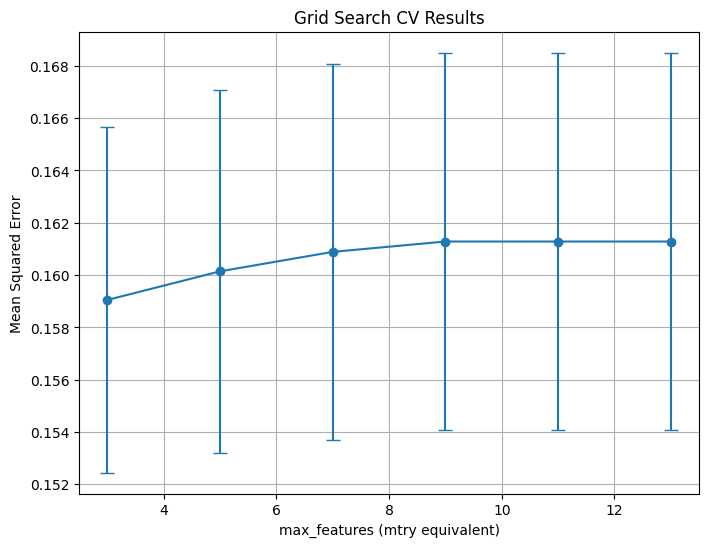

In [18]:
# Define the grid of hyperparameters:
# - min_samples_leaf is the minimum number of samples in a terminal node.
param_grid = {
    "max_features": list(range(3, 15, 2)),
    "min_samples_leaf": [5]
}

# Initialize the RandomForestRegressor:
# - n_estimators is set to 50 (equivalent to num.trees)
# - random_state is set for reproducibility.
# rf = RandomForestRegressor(n_estimators=50, random_state=1917)

rf = RandomForestRegressor(n_estimators=500,  # Number of trees in the forest
                           random_state=42,
                           oob_score=True)    # Use out-of-bag samples to estimate error

# Set up 10-fold cross-validation and GridSearch over the parameters
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on the data
grid_search.fit(X_train, y_train.ravel())

# Extract the best parameters
print("Best Parameters:", grid_search.best_params_)

# To replicate the ggplot visualization from R, we plot the grid search results.
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(8, 6))
plt.errorbar(
    results["param_max_features"].astype(int),
    -results["mean_test_score"],
    yerr=results["std_test_score"],
    fmt="o-",
    capsize=5
)
plt.title("Grid Search CV Results")
plt.xlabel("max_features (mtry equivalent)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


The model performed well on the training data since the training MSE is very low, but this model could use some further refining as the test MSE is slightly larger, suggesting some overfitting. The out-of-bag score indicates that 34.74% of the out-of-bag sample was predicted correctly, which is not very high.
After setting up and fitting a Grid Search on the training data, it was concluded that the optimal max_features is 3. When the max_features are set to 3, the test MSE is the lowest compared to other max_feature values.
Through refining the Random Forest model, we are able to find the most important variables, `rev_utils` and `total_late`, which slightly differ from the biggest weights assigned by the previous logistic regression model.


## PCA and Cluster Analysis

In [ ]:
features = ['rev_util', 'total_late','debt_ratio', 'open_credit', 'real_estate','dependents', 'dlq_2yrs']
cr = cr_agg
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cr[features])


pca = PCA()
X_pca = pca.fit_transform(X_scaled)

### Scree Plot

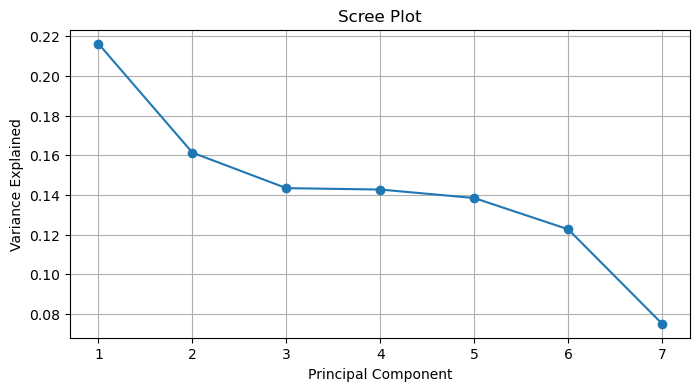

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(features) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

> The scree plot for our PCA analysis shows that ~38% of the total variance is explained by the first two principal components.

### Cluster Analysis

C:\Users\noone\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\noone\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\noone\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\noone\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\noone\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

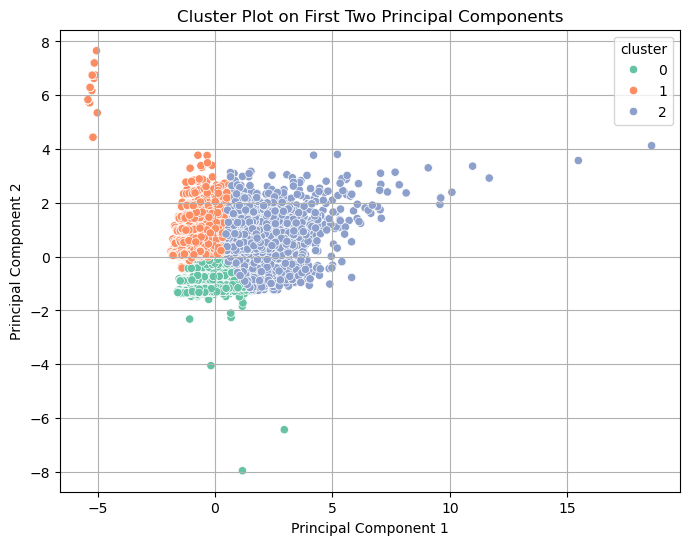

In [ ]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_2)


cr['cluster'] = clusters


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=cr['cluster'], palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot on First Two Principal Components')
plt.grid(True)
plt.show()

> This is a visualization of the KMeans clustering with the first two principal components.
> There can be seen three distinct clusters which have very distinct boundaries between them.
> Cluster 0 which is green, is small when compared to the other two and has seemingly fewer outliers.
> Cluster 1 which is orange is grouped very tightly for the most part.
> Finally, cluster 2 which is purple is much larger than the other two and is more widespread.

> **Overall**: <br>
- This visualization suggests that there exist meaningful groupings within the credit risk data set.

## Multi-Layer Perceptron for Binary Classification

A multi-layer perceptron (MLP) for binary classsification is a form of neural network that takes the role of a classifier deciding between two classes. In this case it is deciding essentially if an individual is risky to lend to or not. The method by which this model was built was by defining multiple user-defined funtions (UDFs) which were then combined into one final training loop. This next section will focus on going over the individual UDFs and how they combine into the final training loop, along with UDFs for performance calculation and predictions. This specific set of UDFs is ONLY for networks with two hidden layers.  

### > `initialize_params`

In [ ]:
def initialize_params(X, num_units_hidden_1, num_units_hidden_2, ): # He Initialization due to ReLU type activation.
  scale1 = np.sqrt(2 / X.shape[1])
  W1 = np.random.randn(X.shape[1], num_units_hidden_1) * scale1

  scale2 = np.sqrt(2 / num_units_hidden_1)
  W2 = np.random.randn(num_units_hidden_1, num_units_hidden_2) * scale2

  scale3 = np.sqrt(2 / num_units_hidden_2)
  W3 = np.random.randn(num_units_hidden_2, 1) * scale3

  b1 = np.zeros((1, num_units_hidden_1))
  b2 = np.zeros((1, num_units_hidden_2))
  b3 = np.zeros((1,1))

  params = {
      'W1': W1,
      'W2': W2,
      'W3': W3,
      'b1': b1,
      'b2': b2,
      'b3': b3
  }

  return params

**Size of Parameter Matrices**<br>
the initialize_params UDF takes a matrix `X` with shape (m,n) - where m = number of training examples, and n = number of features along with `num_units_hidden_1` and `num_units_hidden_2` which are integer values describing how many neurons are in each hidden layer. The purpose is to initialize weights and biases for the specific arcitecture needed, and determined by the inputs of the UDF.

In our specific case X has 8 features, 64 neuarons in HL1, and 32 neurons in HL2. So the resulting shapes are as follows:

    - W1 : (8,64)     - b1 : (1,64)
    - W2 : (64,32)    - b2 : (1,32)
    - W3 : (34,1)     - b3 : (1,1)

**Weights - He Initialization**<br>
The weights are random values from a standard normal distribution (np.random.randn()) and scaled using He Initialization which is an appropriate parameter initialization metod for ReLU type activation functions (Leaky ReLU in our case). The goal of using He Initialization is to avoid vanishing or exploding gradients which would lead to slowed/failed training.

>  ### $scale_i = \sqrt{\frac{2}{n}}$
> Where: n = number of features into layer i

***Thus***, He Initialization here attempts to keep outputs stable across layers when using ReLU type activation functions by multiplying $Wi$ by $scale_i$.

**Biases**<br>
Biases are simply initialized to zeros

**Packaging for Future Use**<br>
The Weights and Biases are then packaged in a dictionary which is the output of the `initialize_params` UDF.

### > `sigmoid`, `leaky_relu`, and `forward_prop`

In [ ]:
def sigmoid(X):
  X = np.clip(X, -500, 500) # To prevent overflow
  g = 1 / (1 + np.exp(-X))
  return g

def leaky_relu(X, alpha_rel):
  return np.where(X > 0, X, alpha_rel * X)

def forward_prop(X, params, alpha_rel): # With Leaky ReLU Activation (np.max(alpha*Z,Z))
  W1 = params['W1']
  W2 = params['W2']
  W3 = params['W3']

  b1 = params['b1']
  b2 = params['b2']
  b3 = params['b3']

  # Hidden 1
  Z1 = np.dot(X, W1) + b1
  A1 = leaky_relu(Z1, alpha_rel)

  # Hidden 2
  Z2 = np.dot(A1, W2) + b2
  A2 = leaky_relu(Z2, alpha_rel)

  # Output
  Z3 = np.dot(A2, W3) + b3
  A3 = sigmoid(Z3)

  cache = {
      'Z1': Z1,
      'A1': A1,
      'Z2': Z2,
      'A2': A2,
      'Z3': Z3,
      'A3': A3
  }

  return cache

**Sigmoid**<br>
* To be used in the forward_prop UDF in the output layer to transform pre-activation $Z^{[3]}$ into probabilites in post-activation $A^{[3]}$
* Takes as inputs:
    * `X`: The pre-activation values of the output layer in the MLP.
$$ g(x) = \frac{1}{1 + e^{-x}}$$

> Returns the probability that the prediction is 1
___
**Leaky ReLU**<br>
* The chosen activation function, which scales values that are less than 0 by a chosen **$\alpha$**, to be used in the forward_prop UDF.
* Takes as inputs:
    * `X`: The pre-activations of the given layer
    * `alpha_rel`: Chosen value for $\alpha$
$$
\text{LeakyReLU}(x) =
\begin{cases}
x, & \text{if } x \geq 0 \\
\alpha x, & \text{if } x < 0
\end{cases}
$$
___
**Forward Propagation**<br>
* The full forward pass function for the 2 hidden layer MLP.
* Takes as inputs:
    * `X`: Input data of size m x n
    * `params`: Dictionary of parameters originally obtained from `initialize_params`
    * `alpha_rel`: Chosen value for $\alpha$ in Leaky ReLU
* Loads in the parameters from `params` and calculates the pre-/post-activations for each layer using Leaky ReLU to find post activations until the output layer while the UDF for sigmoid is used to calculate the probabilized output.

> A Look at the forward pass<br>
$Z_1 = X \cdot W_1 + b_1  \rightarrow\rightarrow\rightarrow A_1 = \text{LeakyReLU}(Z_1)$<br>
$Z_2 = A_1 \cdot W_2 + b_2  \rightarrow\rightarrow\rightarrow A_2 = \text{LeakyReLU}(Z_2)$<br>
$Z_3 = A_2 \cdot W_3 + b_3  \rightarrow\rightarrow\rightarrow A_3 = \text{Sigmoid}(Z_3) = \hat{y}$

* Finally, all of the intermediates are stored in a dictionary labeled `cache` which is returned by the UDF.

### `binary_cross_entropy`

In [ ]:
def binary_cross_entropy(y, cache):
  m,n = y.shape
  epsilon = 1e-12  # To avoid log(0)
  y_hat = np.clip(cache['A3'], epsilon, 1 - epsilon) # To avoid log(0) errors
  bce = -((y*np.log(y_hat)) + ((1-y)*np.log(1-y_hat)))
  cost = np.sum(bce) / m

  return cost

Used to calculate the cost function $\mathcal{J}(W,b)$ which is the loss function $\mathcal{L}(y,\hat{y})$ averaged over all training examples $m$.
* Takes as inputs:
    * `y`: The true label data stored in an m x 1 matrix
    * `cache`: Results of `forward_prop` UDF storing intermediates and probabilities in a dictionary

* $\epsilon$ is defined to be used in the np.clip() of the probabilites $A_3$, so as to avoid $\log{(0)}$ errors.
* Binary cross entropy is then calculated...
    * $\mathcal{L} = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)$
* Then averaged over $m$ training examples
    * $J = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}^{(i)}$
* Cost is then returned by the UDF.

### `leaky_relu_dv`, `back_prop`, and `update_params`

In [ ]:
def leaky_relu_dv(X, alpha_rel):
  return np.where(X > 0, 1, alpha_rel)

def back_prop(X, y, params, cache, alpha_rel):
  W1 = params['W1']
  W2 = params['W2']
  W3 = params['W3']
  b1 = params['b1']
  b2 = params['b2']
  b3 = params['b3']
  Z1 = cache['Z1']
  Z2 = cache['Z2']
  Z3 = cache['Z3']
  A1 = cache['A1']
  A2 = cache['A2']
  A3 = cache['A3']

  m,n = X.shape

  # Output
  dZ3 = A3 - y
  dW3 = np.dot(A2.T, dZ3) /m
  db3 = np.sum(dZ3, axis = 0, keepdims = True) /m

  # Hidden 2
  dA2 = np.dot(dZ3, W3.T)
  dZ2 = dA2 * leaky_relu_dv(Z2, alpha_rel)
  dW2 = np.dot(A1.T, dZ2) /m
  db2 = np.sum(dZ2, axis = 0, keepdims = True) /m

  # Hidden 1
  dA1 = np.dot(dZ2, W2.T)
  dZ1 = dA1 * leaky_relu_dv(Z1, alpha_rel)
  dW1 = np.dot(X.T, dZ1) /m
  db1 = np.sum(dZ1, axis = 0, keepdims = True) /m

  gradients = {
      'dW3': dW3,
      'dW2': dW2,
      'dW1': dW1,
      'db3': db3,
      'db2': db2,
      'db1': db1
  }

  return gradients

def update_params(params, gradients, alpha, clip, clip_value):

  if clip == True:
    gradients['dW1'] = np.clip(gradients['dW1'], -clip_value, clip_value) # Gradient clipping to avoid exploding gradients
    gradients['dW2'] = np.clip(gradients['dW2'], -clip_value, clip_value)
    gradients['dW3'] = np.clip(gradients['dW3'], -clip_value, clip_value)
    gradients['db1'] = np.clip(gradients['db1'], -clip_value, clip_value)
    gradients['db2'] = np.clip(gradients['db2'], -clip_value, clip_value)
    gradients['db3'] = np.clip(gradients['db3'], -clip_value, clip_value)


  params['W1'] -= gradients['dW1'] * alpha
  params['W2'] -= gradients['dW2'] * alpha
  params['W3'] -= gradients['dW3'] * alpha

  params['b1'] -= gradients['db1'] * alpha
  params['b2'] -= gradients['db2'] * alpha
  params['b3'] -= gradients['db3'] * alpha



  return params

**Gradient, Leaky ReLU**<br>
* To be used in the back_prop UDF to calculate the derivative of the Leaky ReLU activation function w.r.t its input.
* Takes as inputs:
    * `X`: Again, the pre-activation value of the layer
    * `alpha_rel`: The chosen $\alpha$ for Leaky ReLU

$$
\text{LeakyReLU}'(x) =
\begin{cases}
1, & \text{if } x \geq 0 \\
\alpha, & \text{if } x < 0
\end{cases}
$$
____
**Backpropagation**<br>
* Calculates the gradients of $\mathcal{J}(W,b)$ w.r.t. the Weights and biases to be used in updating the parameters.
* Takes as inputs:
    * `X`: Input data of size m x n
    * `y`: True label data
    * `params`:  Dictionary of parameters
    * `cache`: Dictionary of intermediates and output
    * `alpha_rel`: Chosen $\alpha$ for Leaky ReLU
* Loads in parameters from `params` and intermediates/output from `cache` and uses them to perform backpropagation to find the gradients.

> ***A look at the backpropagation***<br>
> _________________________________________________________________________________________________________________________________<br>
**Output Layer** -
$$
\frac{\partial\mathcal{J}}{\partial{Z_3}} = A_3 - y
$$
$$
\frac{\partial\mathcal{J}}{\partial{W_3}} =  \frac{A_2^\top \cdot \frac{\partial\mathcal{J}}{\partial{Z_3}}}{m}
$$
$$
\frac{\partial\mathcal{J}}{\partial{b_3}} =  \frac{\sum_{i=1}^{m}\frac{\partial\mathcal{J}}{\partial{Z_3^{(i)}}}}{m}
$$
**HL2** -
$$
\frac{\partial\mathcal{J}}{\partial{A_2}} =  \frac{\partial\mathcal{J}}{\partial{Z_3}}  \cdot W_3^\top
$$
$$
\frac{\partial\mathcal{J}}{\partial{Z_2}} =  \frac{\partial\mathcal{J}}{\partial{A_2}} \cdot LeakyReLU'(Z_2)
$$
$$
\frac{\partial\mathcal{J}}{\partial{W_2}} =  \frac{A_1^\top \cdot \frac{\partial\mathcal{J}}{\partial{Z_2}}}{m}
$$
$$
\frac{\partial\mathcal{J}}{\partial{b_2}} =  \frac{\sum_{i=1}^{m}\frac{\partial\mathcal{J}}{\partial{Z_2^{(i)}}}}{m}
$$
**HL1** -
$$
\frac{\partial\mathcal{J}}{\partial{A_1}} =  \frac{\partial\mathcal{J}}{\partial{Z_2}}  \cdot W_2^\top
$$
$$
\frac{\partial\mathcal{J}}{\partial{Z_1}} =  \frac{\partial\mathcal{J}}{\partial{A_1}} \cdot LeakyReLU'(Z_1)
$$
$$
\frac{\partial\mathcal{J}}{\partial{W_1}} =  \frac{X^\top \cdot \frac{\partial\mathcal{J}}{\partial{Z_1}}}{m}
$$
$$
\frac{\partial\mathcal{J}}{\partial{b_1}} =  \frac{\sum_{i=1}^{m}\frac{\partial\mathcal{J}}{\partial{Z_1^{(i)}}}}{m}
$$
> _________________________________________________________________________________________________________________________________<br>
* Gradients are then stored in a dictionary `gradients` which is returned for future use
____
**Updating Parameters**<br>
- Updates the parameters using gradients calculated with back_prop UDF, and provides the option to clip the gradients if needed.
- Takes as inputs:
    -  `params`: Dictionary with the parameters
    -  `gradients`: Dictionary with gradients from the back_prop UDF
    -  `alpha`: Chosen learning rate $\alpha$
    -  `clip`: True or False, if `clip ==True` the UDF will clip the gradients
    -  `clip_value`: If `clip == True` the gradients will be clipped by the value of `clip_value`

> Basic formula:
$$
P_{new} = P_{old} - \alpha \frac{\partial \mathcal{J}}{\partial P_i}
$$

- The parameters in the `params` dictionary are updated with these new adjusted parameters which is what the UDF returns.

### `training_loop`

In [ ]:
def training_loop(X, y, alpha, alpha_rel, epochs, clip, clip_value, num_units_hidden_1, num_units_hidden_2):
  cost_hist = []
  iter_hist = []
  dw3_hist = []
  dw2_hist = []
  dw1_hist = []
  db3_hist = []
  db2_hist = []
  db1_hist = []
  params = initialize_params(X, num_units_hidden_1, num_units_hidden_2)

  for i in range(epochs):
    iter_hist.append(i)
    cache = forward_prop(X, params, alpha_rel)
    cost = binary_cross_entropy(y, cache)
    cost_hist.append(cost)
    gradients = back_prop(X, y, params, cache, alpha_rel)
    params = update_params(params, gradients, alpha, clip, clip_value)

    dw3_hist.append(gradients['dW3'])
    dw2_hist.append(gradients['dW2'])
    dw1_hist.append(gradients['dW1'])
    db3_hist.append(gradients['db3'])
    db2_hist.append(gradients['db2'])
    db1_hist.append(gradients['db1'])

    if i % 50 == 0:
      print(f'Epoch: {i}/{epochs} --- --- --- Cost: {cost}')
      print('Max dW3:', float(np.max(np.abs(gradients['dW3']))))
      print('Mean A2 > 0:', np.mean(cache['A2'] > 0))
      print('----------------------------------------------')

  gradient_history = {
      'dW3': dw3_hist,
      'dW2': dw2_hist,
      'dW1': dw1_hist,
      'db3': db3_hist,
      'db2': db2_hist,
      'db1': db1_hist,
  }

  return cost_hist, iter_hist, params, cache, gradients, gradient_history # Returns raw sigmoid output in cache['A3']

- #### **Full training loop for the MLP.**
**Performs the forward pass, computes loss/cost, finds the gradients with backpropagation and updates the parameters for a set number of epochs/iterations**

- Takes as inputs:
    - `X`: Training data
    - `y`: Label data
    - `alpha`: Learning rate
    - `alpha_rel`: Alpha for LeakyReLU
    - `epochs`: number of epochs/iterations to run for
    - `clip`: Decide whether or not to clip
    - `clip_value`: Clip by this much
    - `num_units_hidden_1`: Number of units in hidden layer 1
    - `num_units_hidden_2`: number of units in hidden layer 2

* ***General Process***<br>
  - Sets up empty lists to track metrics and gradients<br>
    - Parameters are initialized using `initialize_params`<br>
    - For range of epochs:
        - Perform forward pass with `forward_prop`
        - Use results from forward_prop to calculate cost using `binary_cross_entropy`
        - Gradients are calculated using `back_prop`
        - Parameters are updated using gradients and learning rate $\alpha$ using `update_params`

* Returns:
    - Cost History
    - Iterations
    - Parameter Dictionary
    - Cache Dictionary
    - Gradient Dictionary
    - Gradient History Dictionary

### `predict`, `metrics_compute`, and `to_binary`

In [ ]:
def to_binary(y, threshold):
  return (y > threshold).astype(int)

def predict(X, params, threshold, alpha_rel):
  cache = forward_prop(X, params, alpha_rel)
  y_pred = cache['A3']
  y_pred_bin = to_binary(y_pred, threshold)
  return y_pred, y_pred_bin

def metrics_compute(y_hat, y):
  TP = np.sum((y == 1) & (y_hat == 1))
  FP = np.sum((y == 0) & (y_hat == 1))
  FN = np.sum((y == 1) & (y_hat == 0))
  TN = np.sum((y == 0) & (y_hat == 0))


  print('+------ Confusion Matrix ------+')
  print(f'   {TN}                {FP} ')
  print('|------------------------------|')
  print(f'   {FN}                {TP}')
  print('+------------------------------+')

  accuracy = (TP + TN) / (TP + TN + FP + FN)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  f1 = (2 * precision * recall) / (precision + recall)

  metrics = {
      'TP': TP,
      'TN': TN,
      'FP': FP,
      'FN': FN,
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1': f1
  }


  print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nf1-score: {f1}')

  return metrics

**Binary**<br>
- UDF simply takes the input and sets it to 1 if greater than threshold, or to 0 if less than threshold

**Predict**<br>
- This UDF performs a forward pass with forward_prop and returns the probabilities and binarized output.

**Metrics**<br>
- Calculates many of the metrics necessary to assess a binary classifier.
- Calculates metrics and prints out a confusion matrix
- Calculates accuracy, precision, recall, and f1-score which is also printed
- It returns a dictionary with all of these metrics stored

### **Results**
___

> Below is the confusion matrix for our MLP with a chosen threshold of 0.2, looking into the future it would be beneficial to better tune a proper threshold

<div align='center'>
<pre>
+------ Confusion Matrix ------+
   460                1622
|------------------------------|
   194                1903
+------------------------------+
Accuracy: 0.5654462790141183
Precision: 0.5398581560283688
Recall: 0.9074868860276586
f1-score: 0.6769832799715404
</pre>
</div>

- It can be seen that accuracy and precision measures are very poor and not much better than random chance.
- Recall on the other hand is too high at ~90.7%
- The f1-score is okay at ~67.7%

***What this means:<br>***
- The model performs too far one way, it shows too much affinity for predicting that someone will be a risky borrower
- This is beneficial if the goal here is to avoid risk at all costs, but in most cases this would be considered poor performance because as much as risk is good to avoid, too many unrisky borrowers were deemed risky.

***What could be done better?<br>***
- There could be more time spent exploring different architectures such as different numbers of neurons per layer, more or less hidden layers, threshold optimization, different activation functions, and better tuning of hyperparameters such as the learning rate and epochs.<br>
- Doing these things could lead to a very good model that is proficient in predicting credit risk

# Business/Real-World Applications

Applications of these models could vary widely and be of great importance in a number of fields. Specifically in terms of credit risk, lenders such as banks could better evaluate whether or not a potential borrower is likely to pay them back or not. It could also be useful in finding out which financial characteristics are most important in deciding if someone is risky to lend to or not. Perhaps it could be applicable to areas such as car sales (or any other sale of a high value item). In these areas a seller who may offer financing could run a potential buyer's characteristics through a model like these and decide whether or not they'd like to allow financing. The applications of models such as these is not solely in the area of business, applications can exist anywhere where it's useful to be able to predict between two classes, or, in the case of regularized logistic regression, where it is useful to find how much of an effect a variable has on the target variable. The use cases for these types of models are endless.  

# Conclusion

Four different machine learning models were used in attempt to accurately predict if a borrower would end up committing a serious financial delinquency witin two years. Although these models are not entirely accurate, they still were able to provide meaningful insights, such as the variables with the most influence on our target variable, as well as predicting deliquent borrowers. However, these predictions were not accurate when it came to predicting good borrowers. If given more time, improvements could be made by hypertuning certain parameters in the models, or addressing the outliers in the `late_*` variables differenly, like filtering out the outliers and keeping the indiviudal variables instead of summing them up.  

# ***References***
adilshamim8. (n.d.). Credit Risk Benchmark Dataset [Data set]. Kaggle.<br>https://www.kaggle.com/datasets/adilshamim8/credit-risk-benchmark-dataset